# Python to PLC Communication（Keyence）

2023.7.22 HAI技術士事務所

## PLC側の設定

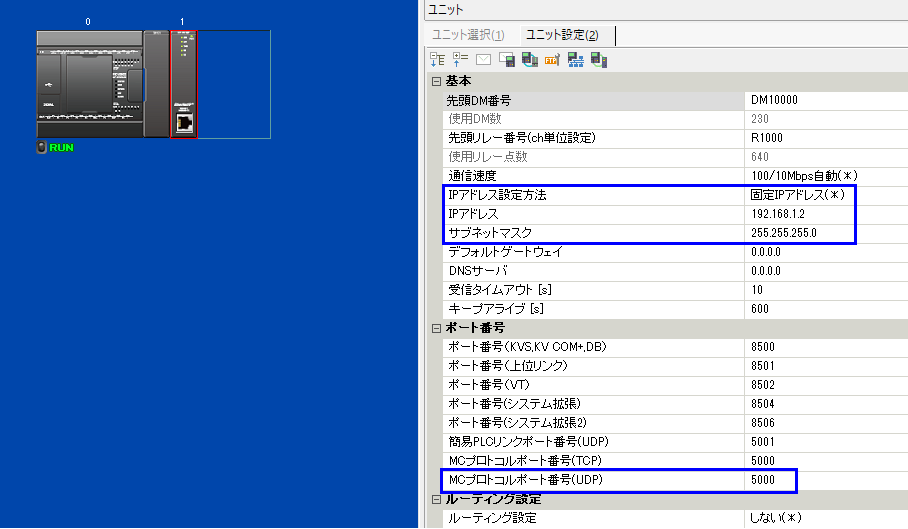

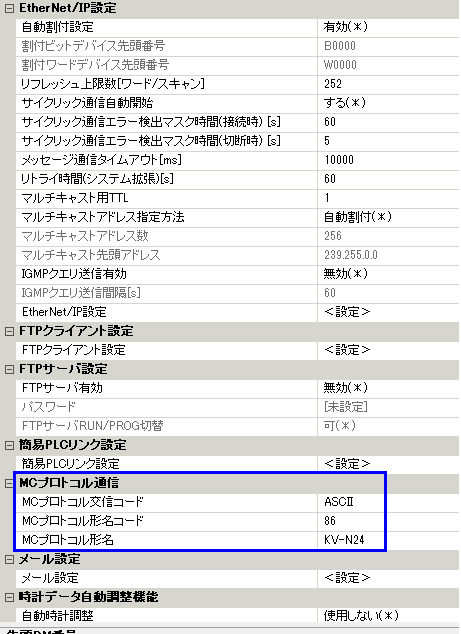

### １．データメモリDMの読み込み　Read the value to DataMemory

In [ ]:
import socket
import binascii

# IP_adress of PLC(connection destination)
host = '192.168.1.2'
port = 5000

# Setting UDP connection
client = socket.socket(socket.AF_INET,socket.SOCK_DGRAM)

# ------------------ Send message ----------------------
Sub_header = '5000'
network_number = '00'
PC_number = 'FF'
IO = '03FF'
kyokuban = '00'
data_length = '0018'   #hex
CPU_timer = '0010'
Command = '0401'       #0401=read,1401=write
sub_Command = '0000' 
DM = 'D*003000'        
data_number = '0001'

msg = Sub_header+network_number+PC_number+IO+kyokuban+data_length+CPU_timer+Command+sub_Command+DM+data_number
msg = msg.encode('utf-8')

# ------------------ send message ----------------------
client.sendto(msg,(host,port))
response = client.recv(1024)
print('Send = ',msg)

print('Response = ',response)
print('Memory value = ',int(response[-1:]))
client.close()

### ２．データメモリDMへの書き込み　Write the value to DataMemory

In [ ]:
import socket
import binascii

# IP_adress of PLC(connection destination)
host = '192.168.1.2'
port = 5000

# Setting UDP connection
client = socket.socket(socket.AF_INET,socket.SOCK_DGRAM)

# ------------------ Send message ----------------------
Sub_header = '5000'
network_number = '00'
PC_number = 'FF'
IO = '03FF'
kyokuban = '00'
data_length = '001C'    #hex
CPU_timer = '0010'
Command = '1401'        #0401=read,1401=write
sub_Command = '0000' 
DM = 'D*003000'
data_number = '0001'
data = '0001'

msg = Sub_header+network_number+PC_number+IO+kyokuban+data_length+CPU_timer+Command+sub_Command+DM+data_number+data

msg = msg.encode('utf-8')

# ------------------ send message ----------------------
client.sendto(msg,(host,port))
response = client.recv(1024)
print('Send = ',msg)

print('Response = ',response)
client.close()

### ３．関数化

In [ ]:
import socket
import binascii

def read_DM(DM):
    
    host = '192.168.1.2'
    port = 5000
    client = socket.socket(socket.AF_INET,socket.SOCK_DGRAM)
    
    Sub_header = '5000'
    network_number = '00'
    PC_number = 'FF'
    IO = '03FF'
    kyokuban = '00'
    data_length = '0018'
    CPU_timer = '0010'
    Command = '0401'
    sub_Command = '0000' 
    DM = DM
    data_number = '0001'

    msg = Sub_header+network_number+PC_number+IO+kyokuban+data_length+CPU_timer+Command+sub_Command+DM+data_number
    msg = msg.encode('utf-8')

    client.sendto(msg,(host,port))
    response = client.recv(1024)
    client.close()
    
    return int(response[-1:])

In [ ]:
read_DM('D*003000')

In [ ]:
import socket
import binascii

def write_DM(DM,data):

    host = '192.168.1.2'
    port = 5000
    client = socket.socket(socket.AF_INET,socket.SOCK_DGRAM)

    Sub_header = '5000'
    network_number = '00'
    PC_number = 'FF'
    IO = '03FF'
    kyokuban = '00'
    data_length = '001C'   
    CPU_timer = '0010'
    Command = '1401' 
    sub_Command = '0000' 
    DM = DM
    data_number = '0001'
    data = data

    msg = Sub_header+network_number+PC_number+IO+kyokuban+data_length+CPU_timer+Command+sub_Command+DM+data_number+data
    msg = msg.encode('utf-8')

    client.sendto(msg,(host,port))
    response = client.recv(1024)

    client.close()
    
    return

In [ ]:
# DM100に1を書き込む
write_DM('DM*000100','0001')

In [ ]:
# Example

import time
t = 0

while True:
    if t == 0:
        write_DM('D*003000','0000')
        t = 1
        time.sleep(1)
        
    else:
        write_DM('D*003000','0001')
        t = 0
        time.sleep(1)
